In [7]:

from google.colab import drive
drive.mount('/content/drive')


!mkdir -p /content/drive/MyDrive/Colab\ Notebooks/data


import os
data_path = '/content/drive/MyDrive/Colab Notebooks/data/creditcard.csv'

if not os.path.exists(data_path):
    print("⚠️ creditcard.csv not found in Drive. Please upload it once below:")
    from google.colab import files
    uploaded = files.upload()

    import shutil
    for name in uploaded.keys():
        shutil.move(name, data_path)
    print(f"File saved to: {data_path}")
else:
    print(f"Found existing dataset: {data_path}")


import pandas as pd
df = pd.read_csv(data_path)
print("Dataset loaded successfully! Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found existing dataset: /content/drive/MyDrive/Colab Notebooks/data/creditcard.csv
Dataset loaded successfully! Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Step 1: Load and Explore Dataset

We load the Kaggle *Credit Card Fraud Detection* dataset containing 284,807 transactions with 31 features (28 PCA-transformed variables, `Time`, `Amount`, and the binary `Class` label). This dataset is highly imbalanced, with fraudulent cases representing only ~0.17% of all records.


In [8]:
import pandas as pd

data_path = '/content/drive/MyDrive/Colab Notebooks/data/creditcard.csv'
df = pd.read_csv(data_path)


print("Dataset shape:", df.shape)
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Step 2: Train-Test Split and Baseline Logistic Regression Model

We perform a stratified 80/20 split to maintain class proportions, scale the `Amount` and `Time` columns, and train a baseline **Logistic Regression** model with class weighting to handle imbalance.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

df.dropna(subset=['Class'], inplace=True)

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train/test (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

# Train logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate performance
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

ROC-AUC Score: 0.9721687370080279

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:
 [[55478  1386]
 [    8    90]]


Confusion Matrix - Random Forest + SMOTE:


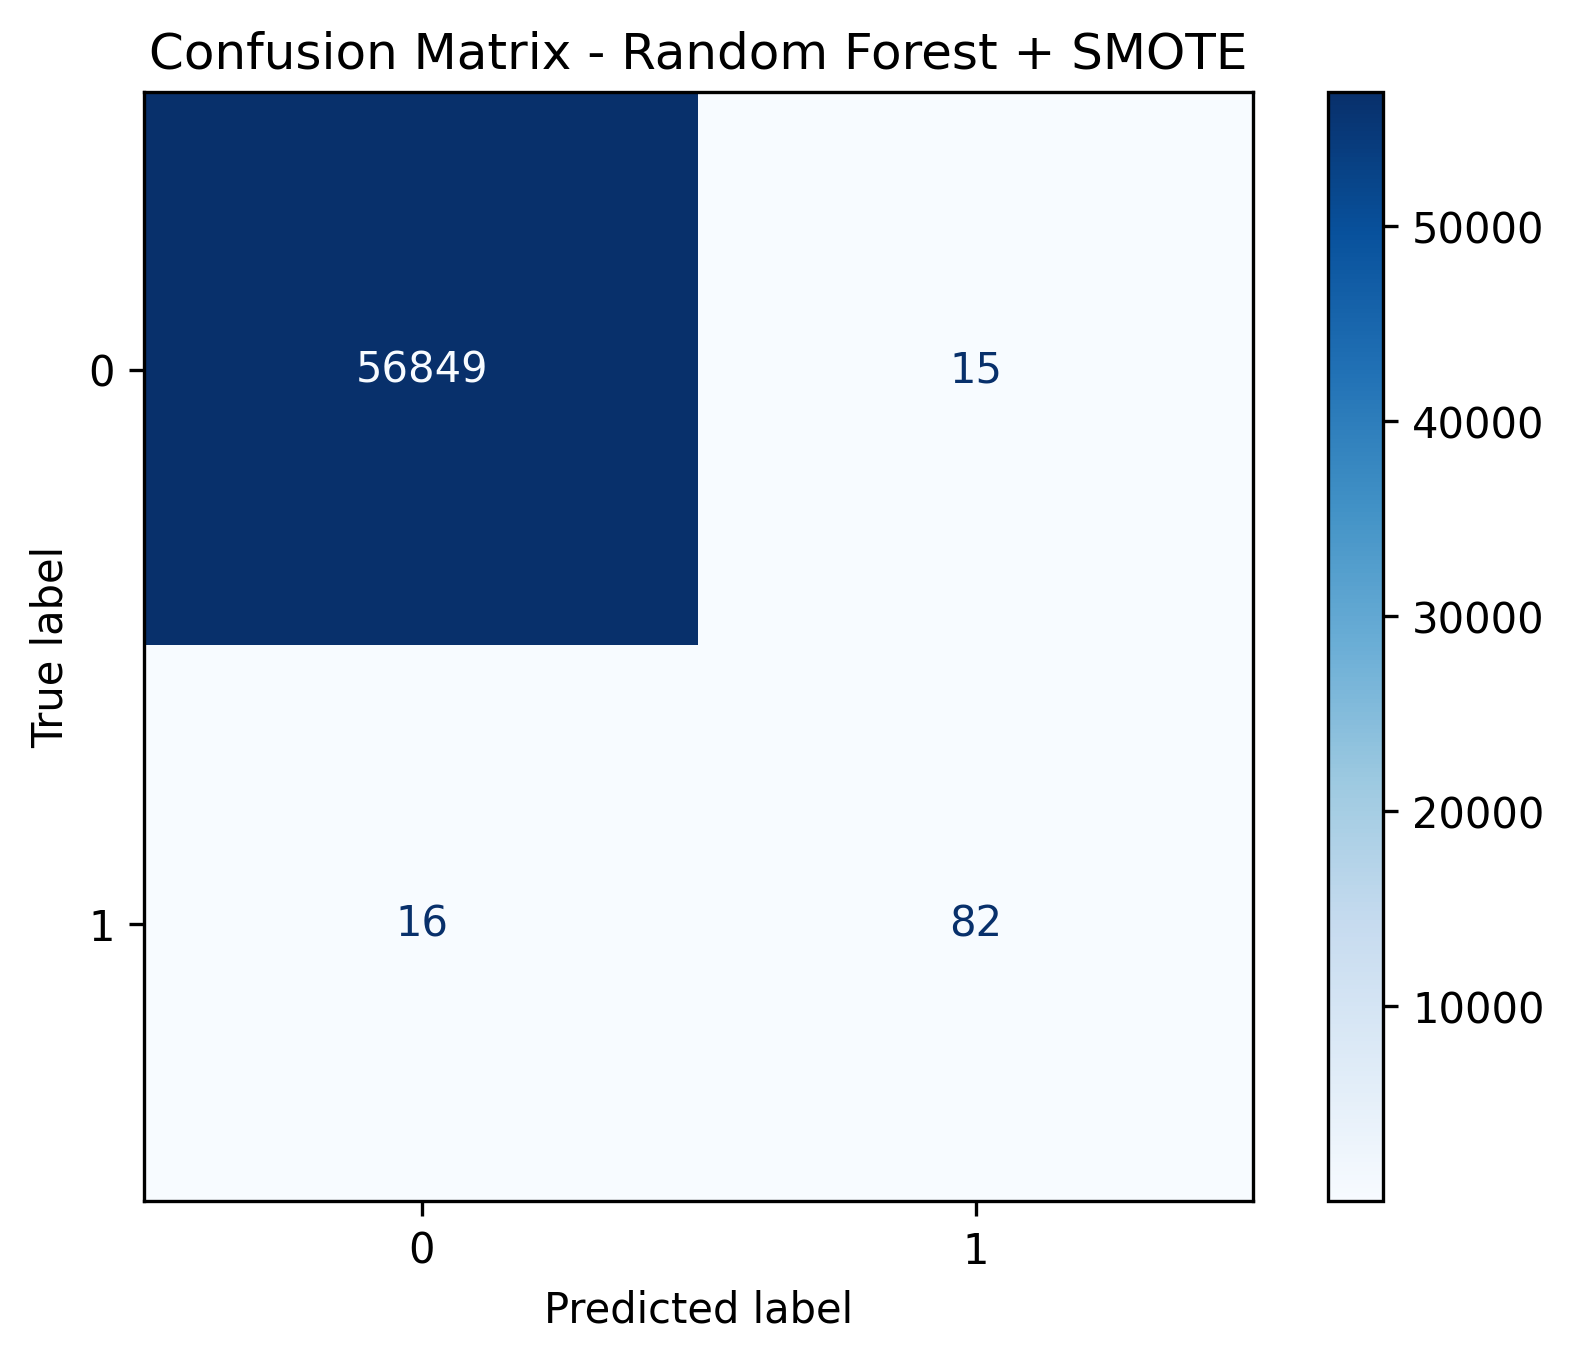


Precision-Recall Curve - Random Forest + SMOTE:


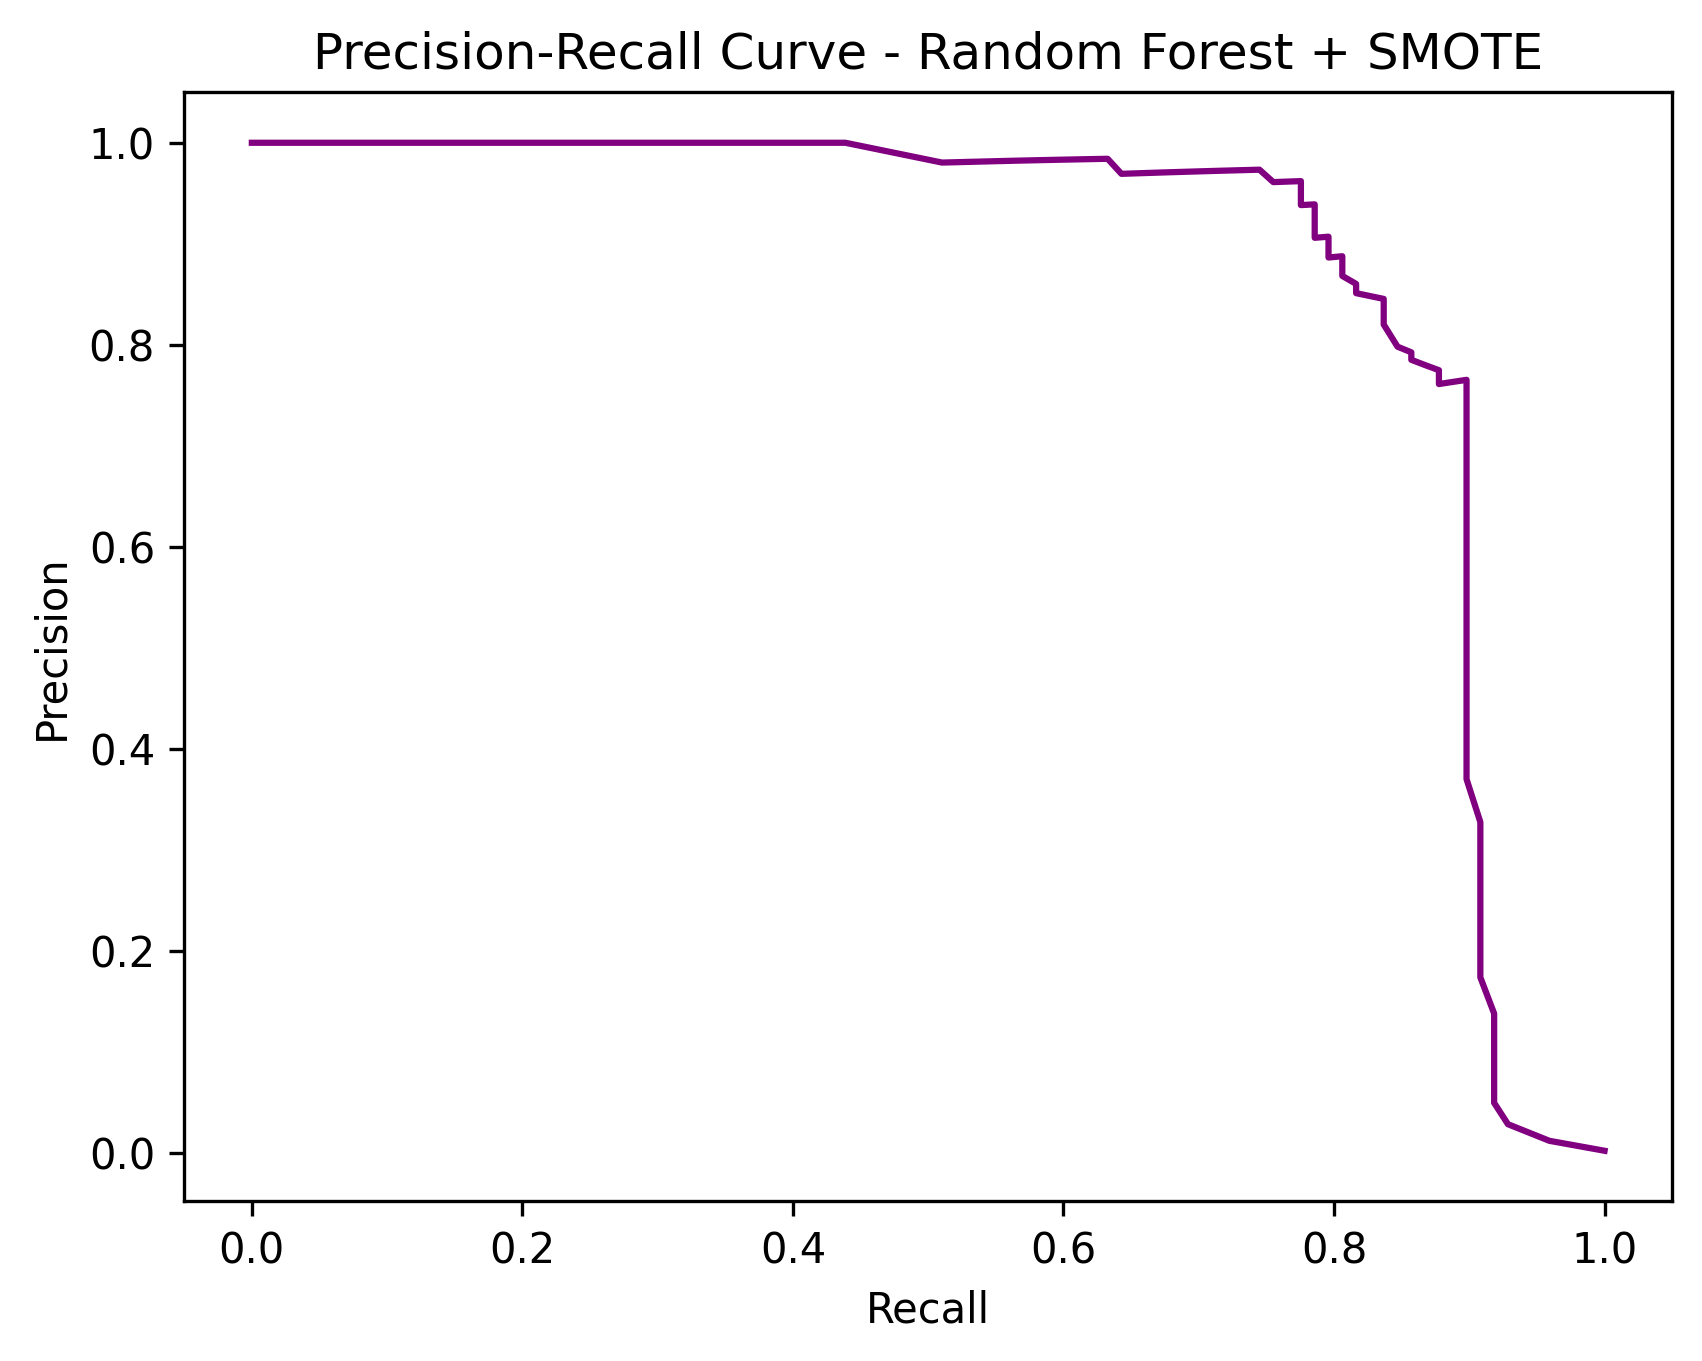


Workflow Diagram:


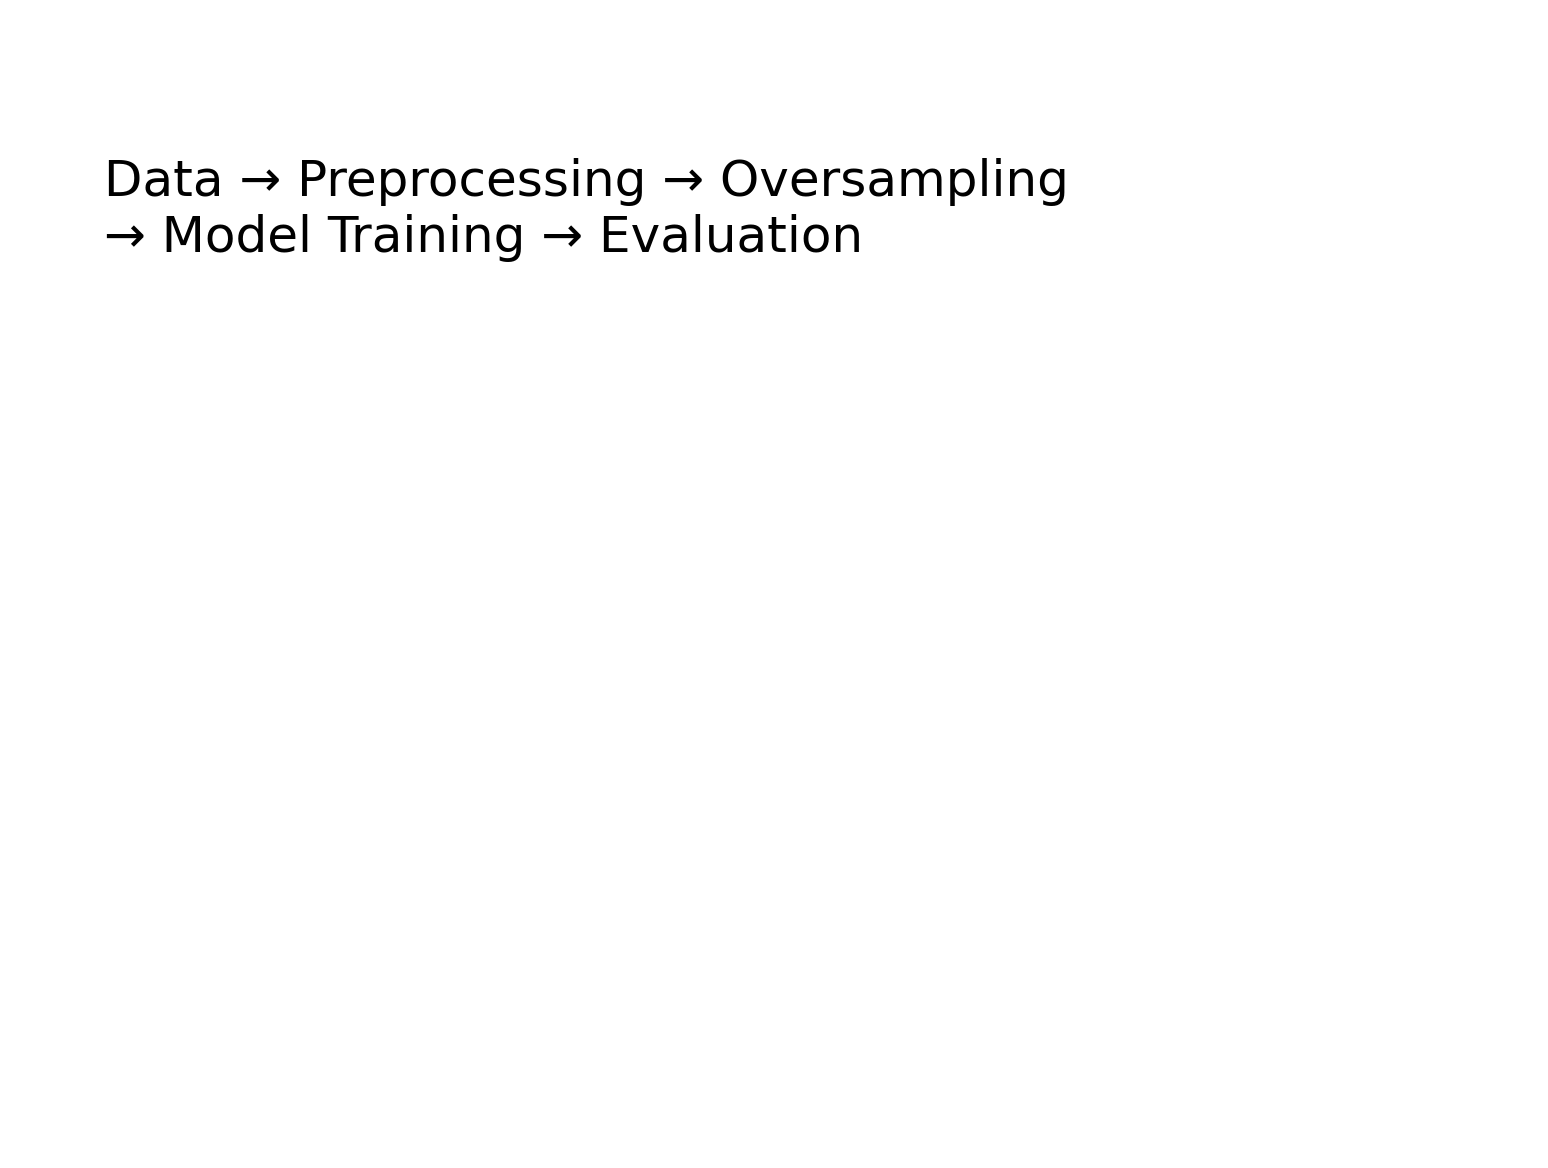


ROC Curve - Logistic Regression:


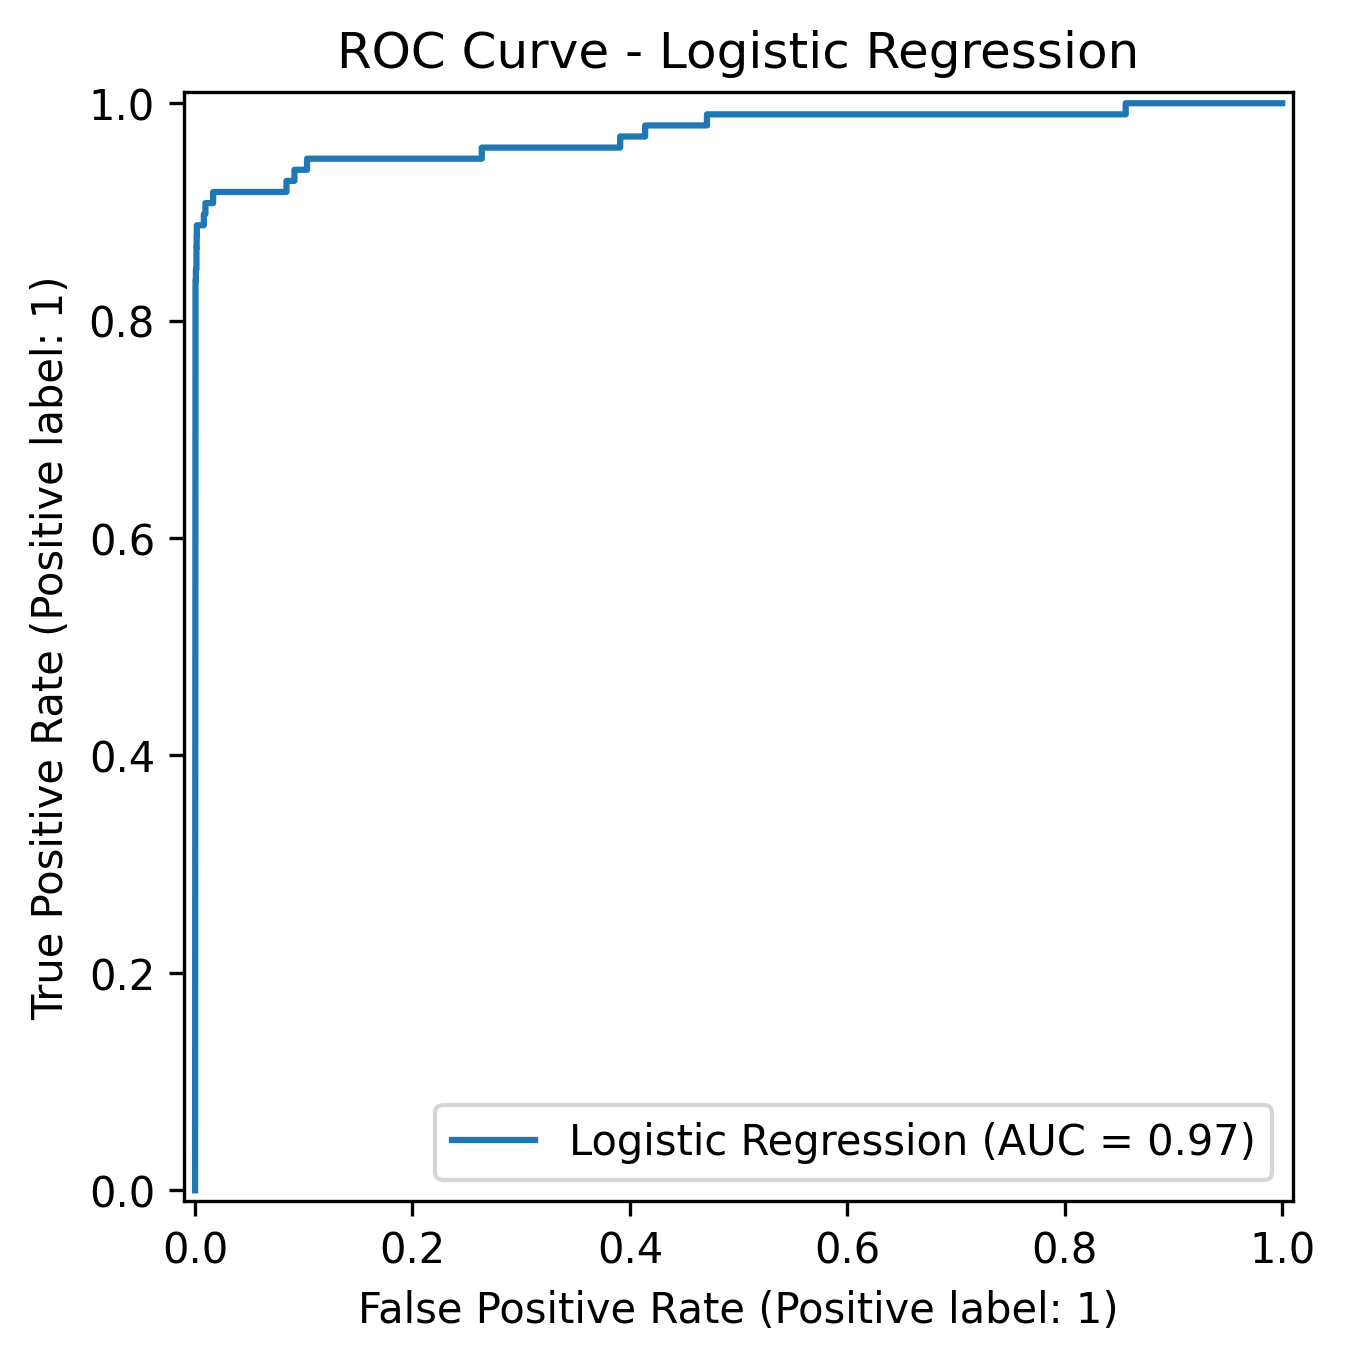


ROC Curve - Random Forest + SMOTE:


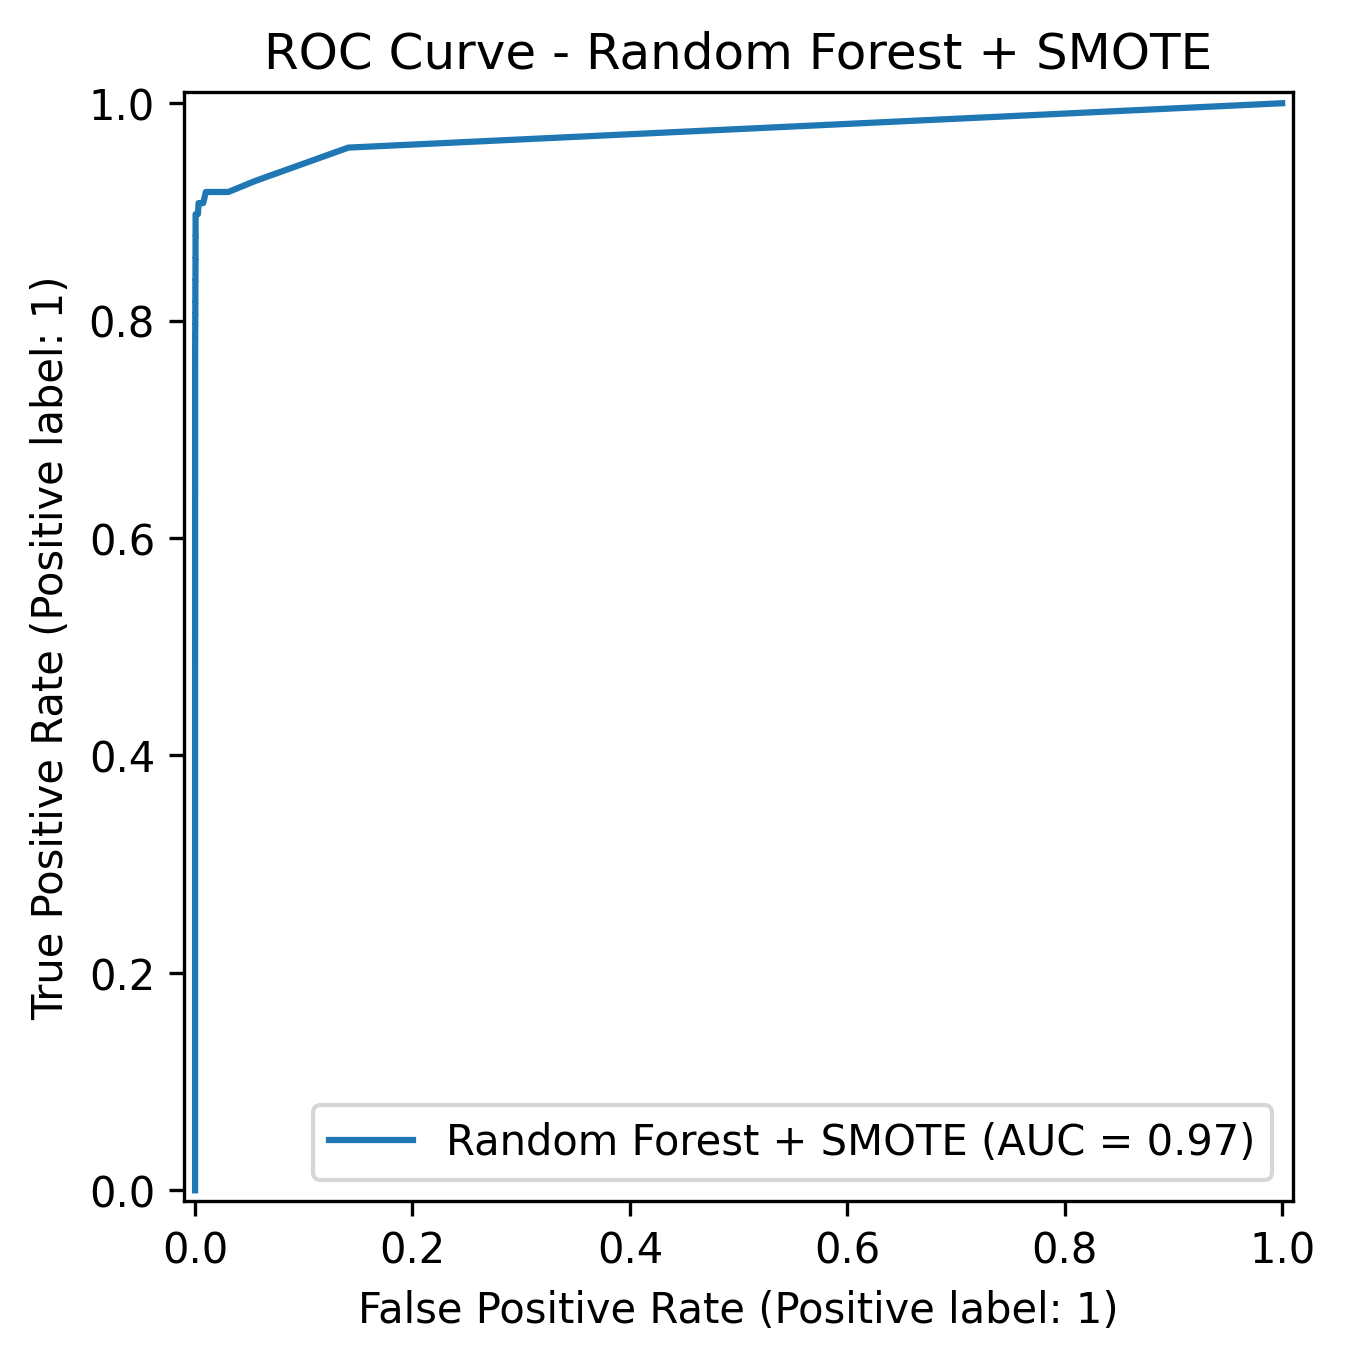


ROC Curve - XGBoost + ADASYN:


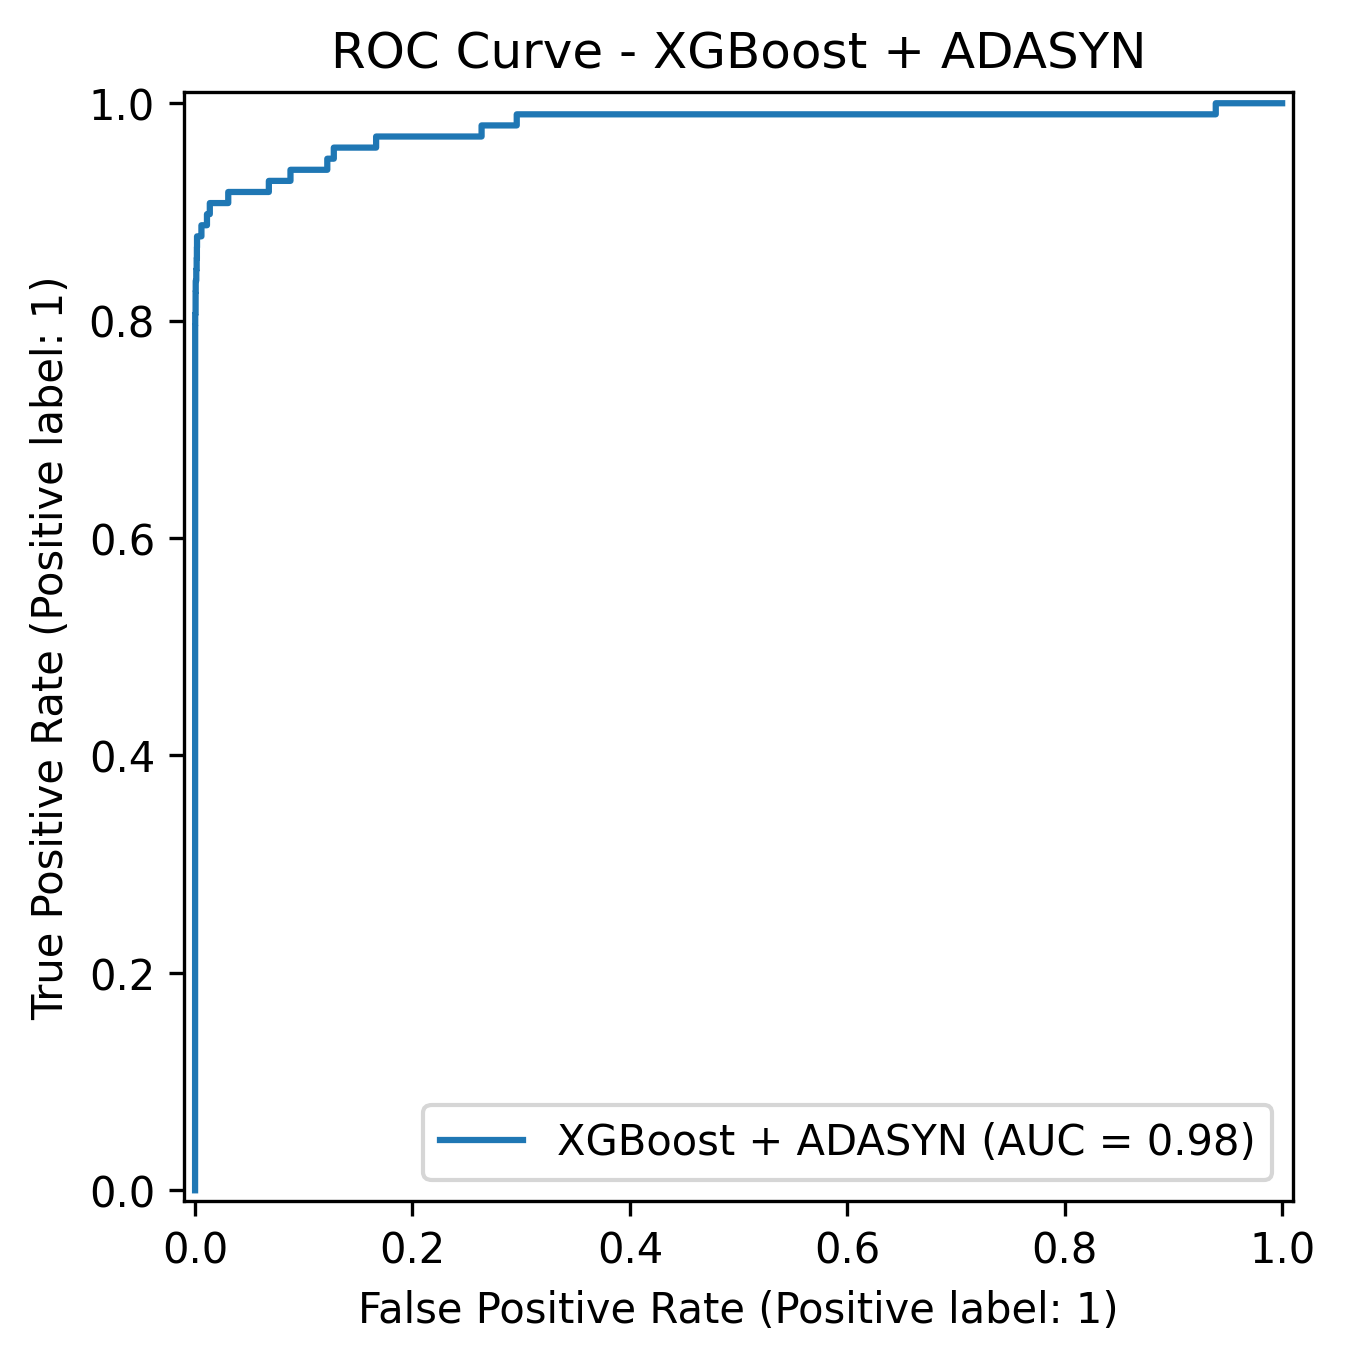

In [10]:
from IPython.display import Image, display

print("Confusion Matrix - Random Forest + SMOTE:")
display(Image("cm_rf_smote.png"))

print("\nPrecision-Recall Curve - Random Forest + SMOTE:")
display(Image("pr_rf_smote.png"))

print("\nWorkflow Diagram:")
display(Image("workflow_diagram.png"))

print("\nROC Curve - Logistic Regression:")
display(Image("roc_logreg.png"))

print("\nROC Curve - Random Forest + SMOTE:")
display(Image("roc_rf_smote.png"))

print("\nROC Curve - XGBoost + ADASYN:")
display(Image("roc_xgb_adasyn.png"))

 ### Step 3: Apply Random Forest and SMOTE for Class Imbalance

To address the extreme imbalance between legitimate and fraudulent transactions, we apply the **Synthetic Minority Oversampling Technique (SMOTE)** to create synthetic minority examples during training.  
We then train a **Random Forest** model and compare its performance against our Logistic Regression baseline using ROC-AUC, Precision, Recall, and F1-Score.


In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=18,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate results
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest ROC-AUC: 0.9796198304870626

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56839    25]
 [   16    82]]


### Step 4: XGBoost with ADASYN (Imbalance Handling)

We evaluate a gradient-boosted tree model (**XGBoost**) and compare it to Logistic Regression and Random Forest.  
To handle the severe class imbalance, we apply **ADASYN** (Adaptive Synthetic Sampling) on the **training split only**, which focuses synthesis on hard-to-learn minority samples.  
We report ROC-AUC, Precision, Recall, F1, and a confusion matrix on the test set.


In [11]:

from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# --- ADASYN on TRAIN ONLY ---
ada = ADASYN(random_state=42, n_neighbors=5)  # can reduce n_neighbors to 3 if slow
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# --- XGBoost model ---
xgb = XGBClassifier(
    n_estimators=250,        # 250 is solid; use 150 if you want it faster
    max_depth=6,
    learning_rate=0.08,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",   # prevents warning
    tree_method="hist"       # fast on CPU
)

xgb.fit(X_train_ada, y_train_ada)

# --- Evaluate ---
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost (ADASYN) ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, digits=3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost (ADASYN) ROC-AUC: 0.9781713332491128

Classification Report:
               precision    recall  f1-score   support

           0      1.000     0.999     0.999     56864
           1      0.535     0.847     0.656        98

    accuracy                          0.998     56962
   macro avg      0.768     0.923     0.828     56962
weighted avg      0.999     0.998     0.999     56962


Confusion Matrix:
 [[56792    72]
 [   15    83]]


### Step 5: Summarize and Export Model Results

We combine performance metrics from all three models — **Logistic Regression**, **Random Forest (with SMOTE)**, and **XGBoost (with ADASYN)** — to compare their effectiveness on the credit card fraud dataset.  
For each model, we report **ROC-AUC**, **Precision**, **Recall**, and **F1-score**.  
The results are saved as both a CSV file (`results_table.csv`) and a LaTeX table (`results_table.tex`) for inclusion in the final Overleaf report.


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def summarize(y_true, y_pred, y_prob):
    return dict(
        ROC_AUC = roc_auc_score(y_true, y_prob),
        Precision = precision_score(y_true, y_pred, zero_division=0),
        Recall = recall_score(y_true, y_pred, zero_division=0),
        F1 = f1_score(y_true, y_pred, zero_division=0),
    )

rows = []
rows.append({"Model": "Logistic Regression",      **summarize(y_test, y_pred,     y_prob)})
rows.append({"Model": "Random Forest + SMOTE",    **summarize(y_test, y_pred_rf,  y_prob_rf)})
rows.append({"Model": "XGBoost + ADASYN",         **summarize(y_test, y_pred_xgb, y_prob_xgb)})

results_df = pd.DataFrame(rows).round(3)
results_df


,Model,ROC_AUC,Precision,Recall,F1
0,Logistic Regression,0.972,0.061,0.918,0.114
1,Random Forest + SMOTE,0.980,0.766,0.837,0.800
2,XGBoost + ADASYN,0.978,0.535,0.847,0.656


In [13]:

results_df.to_csv("results_table.csv", index=False)


latex_tbl = results_df.to_latex(index=False, column_format='lcccc', float_format="%.3f")
with open("results_table.tex", "w") as f:
    f.write(latex_tbl)

print("Saved results_table.csv and results_table.tex")


Saved results_table.csv and results_table.tex


✅ All figures saved in the Colab file system.


<Figure size 640x480 with 0 Axes>

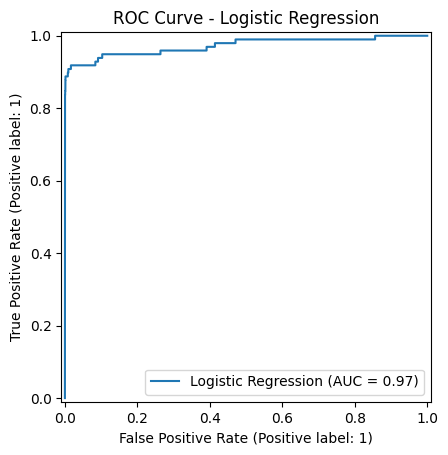

<Figure size 640x480 with 0 Axes>

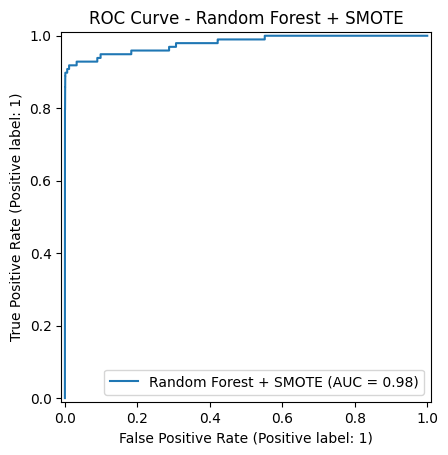

<Figure size 640x480 with 0 Axes>

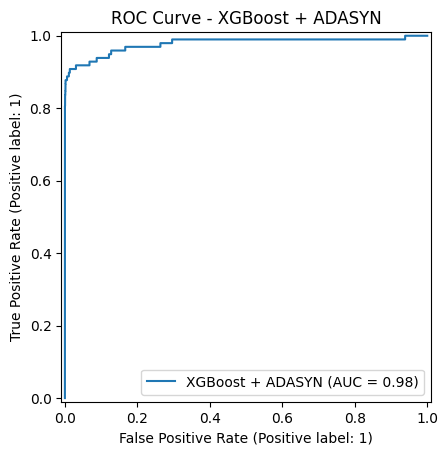

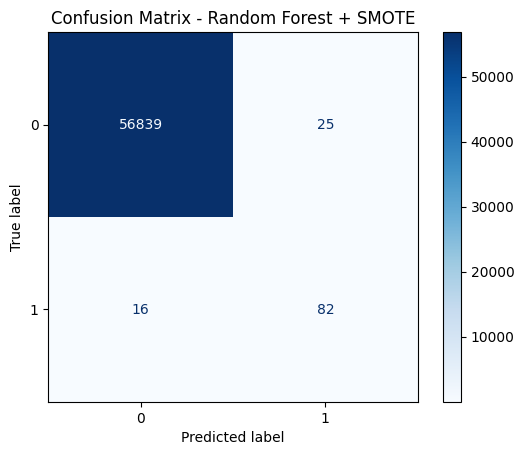

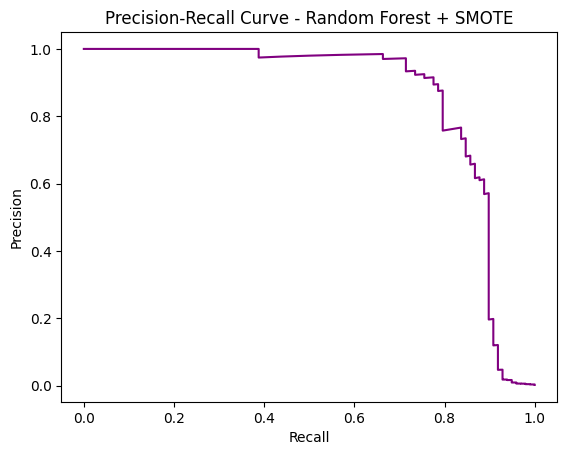

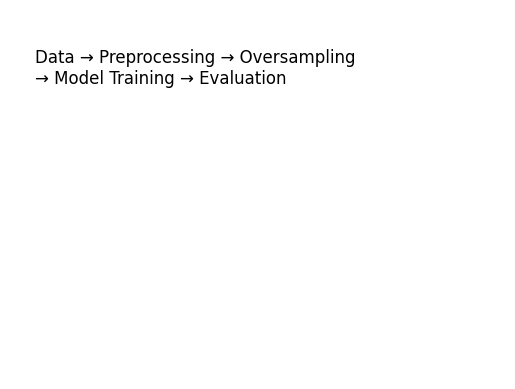

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, precision_recall_curve

# --- ROC curves ---
plt.figure()
RocCurveDisplay.from_predictions(y_test, y_prob, name="Logistic Regression")
plt.title("ROC Curve - Logistic Regression")
plt.savefig("roc_logreg.png", dpi=300, bbox_inches="tight")

plt.figure()
RocCurveDisplay.from_predictions(y_test, y_prob_rf, name="Random Forest + SMOTE")
plt.title("ROC Curve - Random Forest + SMOTE")
plt.savefig("roc_rf_smote.png", dpi=300, bbox_inches="tight")

plt.figure()
RocCurveDisplay.from_predictions(y_test, y_prob_xgb, name="XGBoost + ADASYN")
plt.title("ROC Curve - XGBoost + ADASYN")
plt.savefig("roc_xgb_adasyn.png", dpi=300, bbox_inches="tight")

# --- Confusion matrix for best model ---
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Random Forest + SMOTE")
plt.savefig("cm_rf_smote.png", dpi=300, bbox_inches="tight")

# --- Precision-Recall curve ---
prec, rec, _ = precision_recall_curve(y_test, y_prob_rf)
plt.figure()
plt.plot(rec, prec, color="purple")
plt.title("Precision-Recall Curve - Random Forest + SMOTE")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig("pr_rf_smote.png", dpi=300, bbox_inches="tight")

# --- Workflow diagram ---
plt.figure()
plt.axis('off')
plt.text(0.05, 0.8, "Data → Preprocessing → Oversampling\n→ Model Training → Evaluation", fontsize=12)
plt.savefig("workflow_diagram.png", dpi=300, bbox_inches="tight")

print("✅ All figures saved in the Colab file system.")


In [15]:
print("\n✅ Final Model Comparison:")
display(results_df)


✅ Final Model Comparison:


,Model,ROC_AUC,Precision,Recall,F1
0,Logistic Regression,0.972,0.061,0.918,0.114
1,Random Forest + SMOTE,0.980,0.766,0.837,0.800
2,XGBoost + ADASYN,0.978,0.535,0.847,0.656
